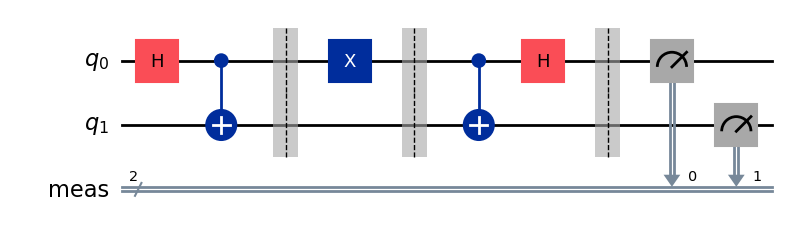

In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit_aer.primitives import Sampler
from qiskit_aer import AerSimulator

c = "1"
d = "0"

protocol = QuantumCircuit(2)

# Prepare ebit used for superdense coding
protocol.h(0)
protocol.cx(0, 1)
protocol.barrier()

# Alice's operations
if c == "1":
    protocol.x(0)
if d == "1":
    protocol.z(0)
protocol.barrier()

# Bob's actions
protocol.cx(0, 1)
protocol.h(0)

protocol.measure_all()


protocol.draw(output='mpl', style= 'iqp')

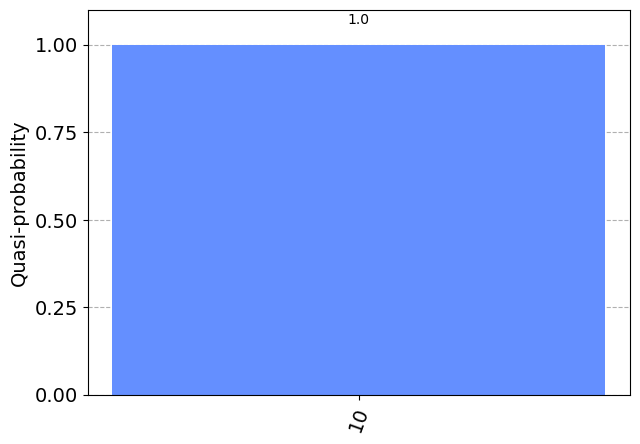

In [2]:
#Running the Aer simulator produces the expected output.
result = Sampler().run(protocol).result()
statistics = result.quasi_dists[0].binary_probabilities()

display(plot_histogram(statistics))